In [22]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

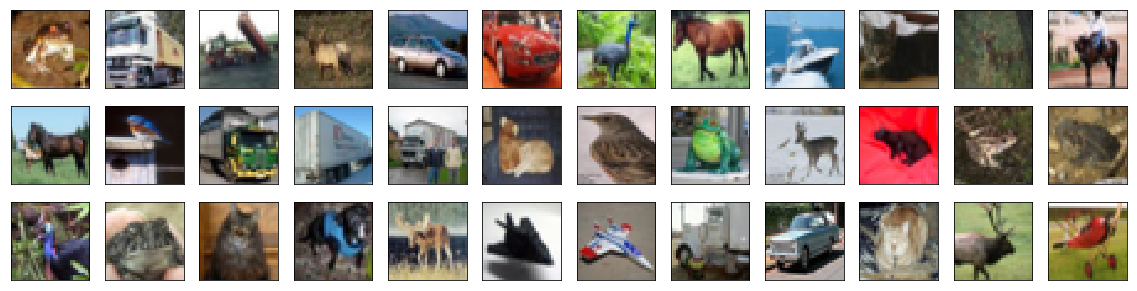

In [23]:
# visualize a small subset of images

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [24]:
# rescacle images

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [25]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training sets
print('X_train Shape:', X_train.shape)

# print the number of training, validation and test images
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')
print(y_train.shape[0], 'test samples')


X_train Shape: (45000, 32, 32, 3)
45000 train samples
5000 validation samples
45000 test samples


In [31]:
# train first model: Regular Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
#train the model

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, save_best_only = True)
hist= model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpointer],verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 127s - loss: 2.3169 - acc: 0.2672 - val_loss: 2.0713 - val_acc: 0.2630

Epoch 00001: val_loss improved from inf to 2.07134, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 134s - loss: 1.8495 - acc: 0.3316 - val_loss: 1.7102 - val_acc: 0.3914

Epoch 00002: val_loss improved from 2.07134 to 1.71025, saving model to MLP.weights.best.hdf5
Epoch 3/20
 - 130s - loss: 1.8018 - acc: 0.3535 - val_loss: 1.7749 - val_acc: 0.3480

Epoch 00003: val_loss did not improve from 1.71025
Epoch 4/20
 - 132s - loss: 1.7826 - acc: 0.3644 - val_loss: 1.8588 - val_acc: 0.3242

Epoch 00004: val_loss did not improve from 1.71025
Epoch 5/20
 - 119s - loss: 1.7647 - acc: 0.3738 - val_loss: 1.7993 - val_acc: 0.3534

Epoch 00005: val_loss did not improve from 1.71025
Epoch 6/20
 - 73s - loss: 1.7591 - acc: 0.3760 - val_loss: 1.6603 - val_acc: 0.4098

Epoch 00006: val_loss improved from 1.71025 to 1.66

In [35]:
model.load_weights('MLP.weights.best.hdf5')

In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test Accuracy:', score[1])


 Test Accuracy: 0.4173


### Train a CNN for the same problem

In [40]:
# Define CNN architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPool2D

# define model
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 64)          0         
__________

In [41]:
# compile cnn
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [42]:
# Train cnn
#train the model

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='CNN.weights.best.hdf5', verbose=1, save_best_only = True)
hist= model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpointer],verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 47s - loss: 1.5640 - acc: 0.4326 - val_loss: 1.5091 - val_acc: 0.4798

Epoch 00001: val_loss improved from inf to 1.50913, saving model to CNN.weights.best.hdf5
Epoch 2/100
 - 44s - loss: 1.2414 - acc: 0.5578 - val_loss: 1.4270 - val_acc: 0.5140

Epoch 00002: val_loss improved from 1.50913 to 1.42700, saving model to CNN.weights.best.hdf5
Epoch 3/100
 - 43s - loss: 1.1240 - acc: 0.6024 - val_loss: 1.1484 - val_acc: 0.5870

Epoch 00003: val_loss improved from 1.42700 to 1.14840, saving model to CNN.weights.best.hdf5
Epoch 4/100
 - 45s - loss: 1.0690 - acc: 0.6272 - val_loss: 1.0025 - val_acc: 0.6554

Epoch 00004: val_loss improved from 1.14840 to 1.00250, saving model to CNN.weights.best.hdf5
Epoch 5/100
 - 44s - loss: 1.0283 - acc: 0.6410 - val_loss: 0.9245 - val_acc: 0.6928

Epoch 00005: val_loss improved from 1.00250 to 0.92450, saving model to CNN.weights.best.hdf5
Epoch 6/100
 - 43s - loss: 1.0022 - acc: 0.6534 - val_l

In [43]:
model.load_weights('CNN.weights.best.hdf5')

In [44]:
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test Accuracy:', score[1])


 Test Accuracy: 0.6885


In [46]:
# get predictions on the test set
y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

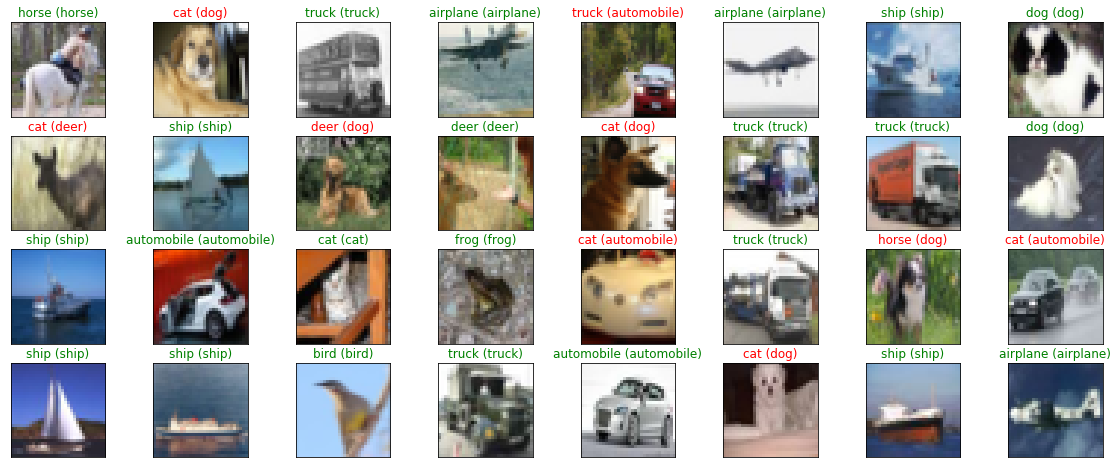

In [47]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))